In [148]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [149]:
seattle = pd.read_csv('train.csv')
seattle.head()

,idx,date,precipitation,temp_max,temp_min,wind,weather
0,0,12/23/2015,6.1,5.0,2.8,7.6,0
1,1,2/1/2014,2.0,7.8,2.8,0.8,0
2,2,7/21/2014,0.0,23.9,13.3,2.2,1
3,3,3/11/2013,1.3,10.6,6.1,1.1,0
4,4,9/21/2013,0.0,21.1,13.3,2.5,1


In [150]:
seattle.nunique()

idx              1022
date             1022
precipitation      97
temp_max           66
temp_min           53
wind               76
weather             5
dtype: int64

In [151]:
df = seattle[(seattle['weather']==1) | (seattle['weather']==0)]
df.shape

(896, 7)

In [152]:
def bootstrap_dataset(dataset, sample_size, number_of_samples):
    bootstrapped_datasets = []
    
    for sample_index in range(0, number_of_samples):
        sampled_dataset = np.random.choice(dataset, size=sample_size)
        bootstrapped_datasets.append(sampled_dataset)
        print(sampled_dataset)
    
    return bootstrapped_datasets

In [153]:
def encode_features(array):
    encoder = preprocessing.LabelEncoder().fit(array)
    return encoder.transform(array)

In [154]:
def build_decision_tree(features, targets):
    train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=123)
    
    decision_tree = tree.DecisionTreeClassifier(random_state=456)
    decision_tree.fit(train_features, train_targets)
    
    print("Test Set Mean Squared Error = " + str(np.round(1 - decision_tree.score(test_features, test_targets), 2)))

In [155]:
def build_random_forest(features,targets):
    random_forest = RandomForestClassifier(random_state=4567, bootstrap=True, oob_score=True)
    random_forest.fit(features, targets)
    # Out-Of-Bag Error
    oob_error = np.round(random_forest.oob_score_,2)
    print("Random Forest with " + str(len(random_forest.estimators_)) + " trees has OOB Error: " + str(oob_error))

In [156]:
def oob_error_viz(features, targets, number_trees):
    # range is exclusive, it stops at N+1
    # starts with 5 trees, otherwise its too few for the algorithm to run
    min_number_trees = 5
    max_depth_array = range(min_number_trees, number_trees+1)
    oob_error_array = []
    for tree_i in max_depth_array:
        # show progress on computation
        if tree_i % 25 == 0:
            print("Building Random Forest with " + str(tree_i) + " trees")
        random_forest = RandomForestClassifier (random_state=4567, bootstrap=True, oob_score=True, n_estimators=tree_i)
        random_forest.fit(features, targets)
        # Out-Of-Bag Error
        oob_error_array.append(np.round(random_forest.oob_score_, 2))
        
    # outputs the Lowest 00B error and the 00B error for the biggest random forest built.
    lowest_oob_error = min(oob_error_array)
    best_forest_size = oob_error_array.index(lowest_oob_error) + min_number_trees
    print("\nrandom Forest with " + str(best_forest_size) + " trees, has lowest 0OB Error= " + str(lowest_oob_error))
    print("Random Forest with " + str(number_trees) + " trees, has lowest 00B Error = " + str(oob_error_array[-1]))
    fig, ax = plt.subplots(figsize=(17, 12))
    # removing all borders except bottom ax. spines['top'].set_visible(False) ax.spines ['right'].set_visible(False)
    # setting y-axis limit to range to be from 0 to 1.
    plt.ylim([0, 1])
    ax.plot(max_depth_array, oob_error_array, color='#435373', linewidth=3)
    # setting plot title and naming axes
    plt.title("Out-Of-Bag Error as a function of number of trees\n in Random Forest", fontsize=25) 
    ax.set_xlabel("Number of trees in Random Forest", fontsize=18, labelpad=15) 
    ax.set_ylabel("00B Error", fontsize=18, labelpad=15) 
    plt.show()

In [157]:
bootstrap_dataset(df['date'], sample_size=5, number_of_samples=6)

['4/30/2012' '6/2/2015' '7/25/2012' '9/22/2015' '8/25/2015']
['2/27/2015' '5/22/2014' '12/9/2012' '12/22/2014' '6/18/2012']
['3/22/2015' '1/22/2014' '10/3/2015' '1/12/2014' '4/13/2013']
['1/23/2015' '2/21/2015' '10/29/2012' '11/30/2012' '7/29/2014']
['10/26/2012' '8/15/2013' '2/17/2014' '2/1/2014' '2/16/2013']
['2/25/2015' '8/27/2013' '8/26/2013' '5/10/2013' '1/29/2015']


[array(['4/30/2012', '6/2/2015', '7/25/2012', '9/22/2015', '8/25/2015'],
       dtype=object),
 array(['2/27/2015', '5/22/2014', '12/9/2012', '12/22/2014', '6/18/2012'],
       dtype=object),
 array(['3/22/2015', '1/22/2014', '10/3/2015', '1/12/2014', '4/13/2013'],
       dtype=object),
 array(['1/23/2015', '2/21/2015', '10/29/2012', '11/30/2012', '7/29/2014'],
       dtype=object),
 array(['10/26/2012', '8/15/2013', '2/17/2014', '2/1/2014', '2/16/2013'],
       dtype=object),
 array(['2/25/2015', '8/27/2013', '8/26/2013', '5/10/2013', '1/29/2015'],
       dtype=object)]

In [158]:
features = df[["date", "precipitation", "temp_max", "temp_min", "wind"]].values
targets = df['weather'].values

# encoding features
features[:, 0] = encode_features(features[:, 0])
targets = encode_features(targets)
build_decision_tree(features, targets)

Test Set Mean Squared Error = 0.04


In [159]:
build_random_forest(features, targets)

Random Forest with 100 trees has OOB Error: 0.96


/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

Building Random Forest with 25 trees
Building Random Forest with 50 trees
Building Random Forest with 75 trees
Building Random Forest with 100 trees
Building Random Forest with 125 trees
Building Random Forest with 150 trees

random Forest with 5 trees, has lowest 0OB Error= 0.89
Random Forest with 150 trees, has lowest 00B Error = 0.96


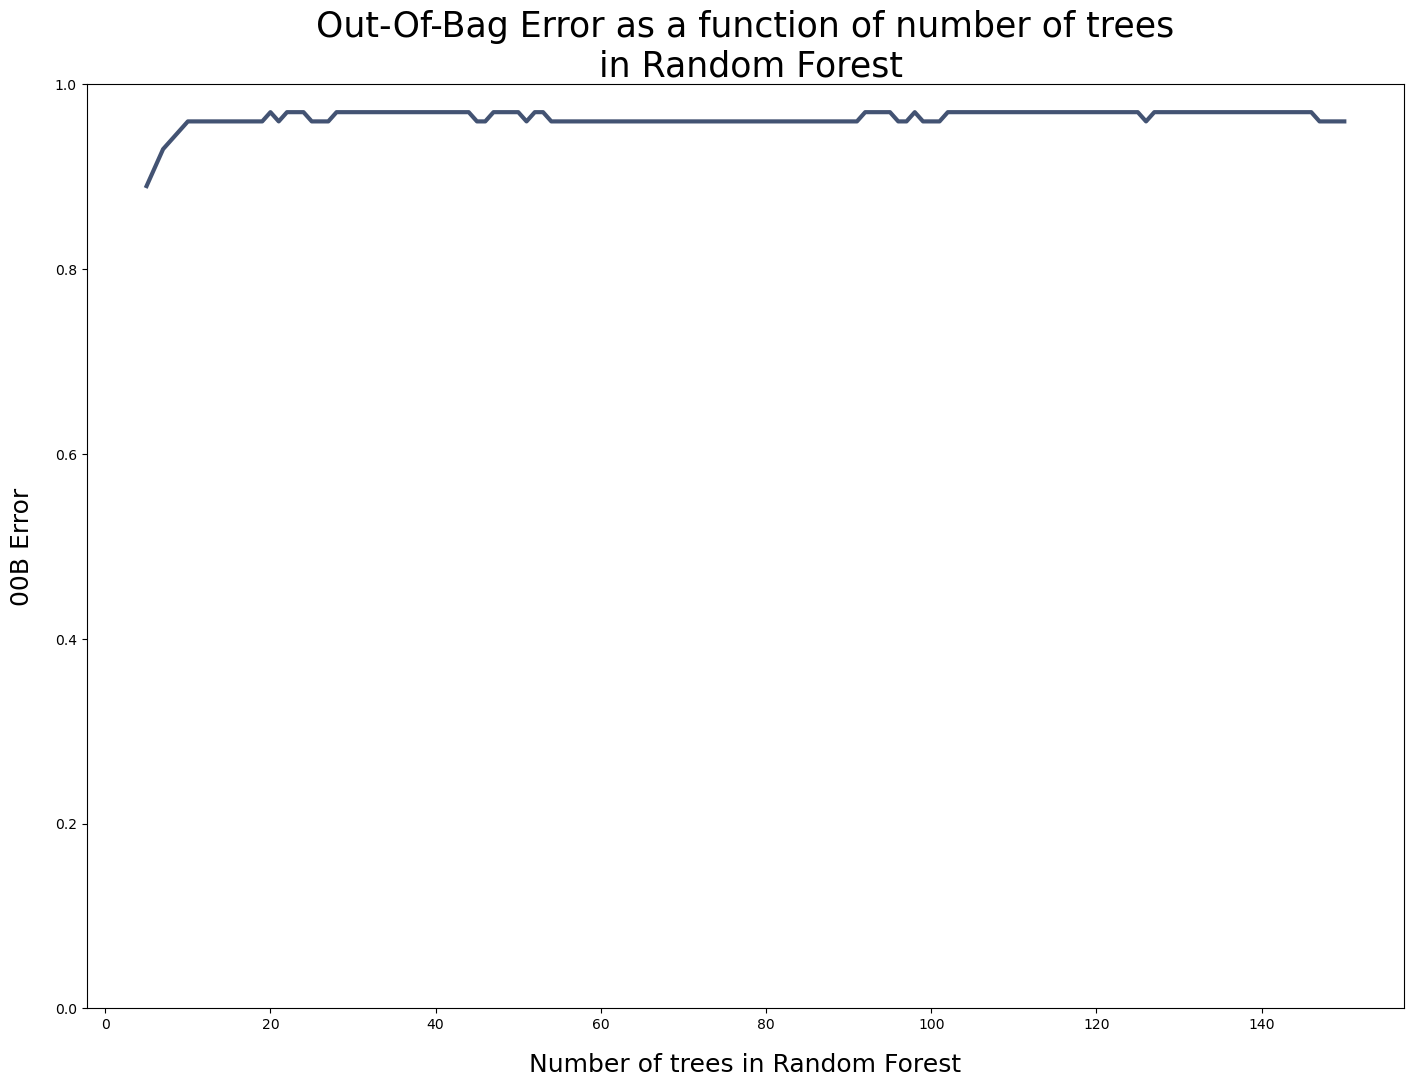

In [160]:
oob_error_viz(features, targets, number_trees=150)